In [1]:
from collections import Counter
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.utils.data
import math
import torch.nn.functional as F

In [2]:
# The dataset cannot be download as zip now but can be download from convokit https://github.com/CornellNLP/ConvoKit
!pip3 install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from convokit import Corpus, download
corpus = Corpus(filename=download("movie-corpus"))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
model_directory: ~/.convokit/saved-models
default_backend: mem


In [7]:
# # prompt: need to get the movie data for previous below two:corpus_movie_conv = 'cornell movie-dialogs corpus/movie_conversations.txt'
# # corpus_movie_lines = 'cornell movie-dialogs corpus/movie_lines.txt' from current convokit libirary, the convokit for movie-corpus is using corpus = Corpus(filename=download("movie-corpus")), but how to get that data I need?

# from collections import Counter
# import json
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset
# import torch.utils.data
# import math
# import torch.nn.functional as F
# from convokit import Corpus, download

# # Install convokit if not already installed
# # !pip3 install convokit  # Uncomment if needed

# # Download and load the movie-corpus
# corpus = Corpus(filename=download("movie-corpus"))

# Access the movie conversations data
corpus_movie_conv = []
for utt in corpus.iter_utterances():
    corpus_movie_conv.append(utt)

# Access the movie lines data (example: extract text)
corpus_movie_lines = []
for utt in corpus.iter_utterances():
    corpus_movie_lines.append(utt.text)


# Now you can use corpus_movie_conv and corpus_movie_lines
# Example: print the first 5 conversations and lines
print("First 5 conversations:")
for i in range(min(5, len(corpus_movie_conv))):
  print(corpus_movie_conv[i])
print("\nFirst 5 lines:")
for i in range(min(5, len(corpus_movie_lines))):
  corpus_movie_lines[i]

First 5 conversations:
Utterance(id: 'L1045', conversation_id: L1044, reply-to: L1044, speaker: Speaker(id: 'u0', vectors: [], meta: ConvoKitMeta({'character_name': 'BIANCA', 'movie_idx': 'm0', 'movie_name': '10 things i hate about you', 'gender': 'f', 'credit_pos': '4'})), timestamp: None, text: 'They do not!', vectors: [], meta: ConvoKitMeta({'movie_id': 'm0', 'parsed': [{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PRP', 'dep': 'nsubj', 'up': 1, 'dn': []}, {'tok': 'do', 'tag': 'VBP', 'dep': 'ROOT', 'dn': [0, 2, 3]}, {'tok': 'not', 'tag': 'RB', 'dep': 'neg', 'up': 1, 'dn': []}, {'tok': '!', 'tag': '.', 'dep': 'punct', 'up': 1, 'dn': []}]}]}))
Utterance(id: 'L1044', conversation_id: L1044, reply-to: None, speaker: Speaker(id: 'u2', vectors: [], meta: ConvoKitMeta({'character_name': 'CAMERON', 'movie_idx': 'm0', 'movie_name': '10 things i hate about you', 'gender': 'm', 'credit_pos': '3'})), timestamp: None, text: 'They do to!', vectors: [], meta: ConvoKitMeta({'movie_id': 'm0', 'parsed':

In [10]:
corpus.get_conversations_dataframe()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
...,...,...,...,...,...,...,...
L666324,[],m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w..."
L666262,[],m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w..."
L666520,[],m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w..."


In [ ]:
# corpus_movie_conv = 'cornell movie-dialogs corpus/movie_conversations.txt'
# corpus_movie_lines = 'cornell movie-dialogs corpus/movie_lines.txt'

# Access the movie conversations data
corpus_movie_conv = []
for utt in corpus.iter_utterances():
    corpus_movie_conv.append(utt)

# Access the movie lines data (example: extract text)
corpus_movie_lines = []
for utt in corpus.iter_utterances():
    corpus_movie_lines.append(utt.text)

max_len = 25

In [ ]:
with open(corpus_movie_conv, 'r') as c:
    conv = c.readlines()

In [ ]:
with open(corpus_movie_lines, 'r') as l:
    lines = l.readlines()

In [ ]:
lines_dic = {}
for line in lines:
    objects = line.split(" +++$+++ ")
    lines_dic[objects[0]] = objects[-1]

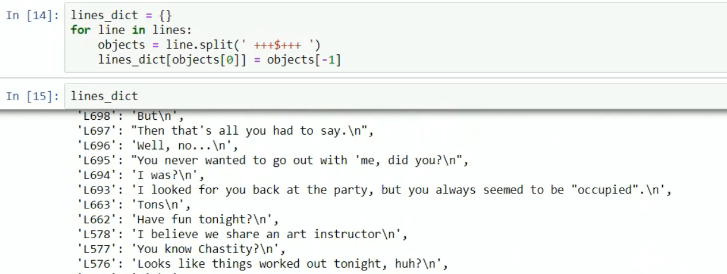

In [ ]:
def remove_punc(string):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in string:
        if char not in punctuations:
            no_punct = no_punct + char  # space is also a character
    return no_punct.lower()

In [ ]:
pairs = []
for con in conv:
    ids = eval(con.split(" +++$+++ ")[-1])
    for i in range(len(ids)):
        qa_pairs = []

        if i==len(ids)-1:
            break

        first = remove_punc(lines_dic[ids[i]].strip())
        second = remove_punc(lines_dic[ids[i+1]].strip())
        qa_pairs.append(first.split()[:max_len])
        qa_pairs.append(second.split()[:max_len])
        pairs.append(qa_pairs)

In [ ]:
word_freq = Counter()
for pair in pairs:
    word_freq.update(pair[0])
    word_freq.update(pair[1])

In [ ]:
min_word_freq = 5
words = [w for w in word_freq.keys() if word_freq[w] > min_word_freq]
word_map = {k: v + 1 for v, k in enumerate(words)}
word_map['<unk>'] = len(word_map) + 1
word_map['<start>'] = len(word_map) + 1
word_map['<end>'] = len(word_map) + 1
word_map['<pad>'] = 0

In [ ]:
print("Total words are: {}".format(len(word_map)))

In [ ]:
with open('WORDMAP_corpus.json', 'w') as j:
    json.dump(word_map, j)

In [ ]:
def encode_question(words, word_map):
    enc_c = [word_map.get(word, word_map['<unk>']) for word in words] + [word_map['<pad>']] * (max_len - len(words))
    return enc_c

In [ ]:
def encode_reply(words, word_map):
    enc_c = [word_map['<start>']] + [word_map.get(word, word_map['<unk>']) for word in words] + \
    [word_map['<end>']] + [word_map['<pad>']] * (max_len - len(words))
    return enc_c

In [ ]:
pairs_encoded = []
for pair in pairs:
    qus = encode_question(pair[0], word_map)
    ans = encode_reply(pair[1], word_map)
    pairs_encoded.append([qus, ans])

In [ ]:
with open('pairs_encoded.json', 'w') as p:
    json.dump(pairs_encoded, p)

In [ ]:
# rev_word_map = {v: k for k, v in word_map.items()}
# ' '.join([rev_word_map[v] for v in pairs_encoded[1][0]])

In [ ]:
class Dataset(Dataset):

    def __init__(self):

        self.pairs = json.load(open('pairs_encoded.json'))
        self.dataset_size = len(self.pairs)

    def __getitem__(self, i):

        question = torch.LongTensor(self.pairs[i][0])
        reply = torch.LongTensor(self.pairs[i][1])

        return question, reply

    def __len__(self):
        return self.dataset_size

In [ ]:
train_loader = torch.utils.data.DataLoader(Dataset(),
                                           batch_size = 100,
                                           shuffle=True,
                                           pin_memory=True)

In [ ]:
# question, reply = next(iter(train_loader))

In [ ]:
def create_masks(question, reply_input, reply_target):

    def subsequent_mask(size):
        mask = torch.triu(torch.ones(size, size)).transpose(0, 1).type(dtype=torch.uint8)
        return mask.unsqueeze(0)

    question_mask = question!=0
    question_mask = question_mask.to(device)
    question_mask = question_mask.unsqueeze(1).unsqueeze(1)         # (batch_size, 1, 1, max_words)

    reply_input_mask = reply_input!=0
    reply_input_mask = reply_input_mask.unsqueeze(1)  # (batch_size, 1, max_words)
    reply_input_mask = reply_input_mask & subsequent_mask(reply_input.size(-1)).type_as(reply_input_mask.data)
    reply_input_mask = reply_input_mask.unsqueeze(1) # (batch_size, 1, max_words, max_words)
    reply_target_mask = reply_target!=0              # (batch_size, max_words)

    return question_mask, reply_input_mask, reply_target_mask

In [ ]:
class Embeddings(nn.Module):
    """
    Implements embeddings of the words and adds their positional encodings.
    """
    def __init__(self, vocab_size, d_model, max_len = 50):
        super(Embeddings, self).__init__()
        self.d_model = d_model
        self.dropout = nn.Dropout(0.1)
        self.embed = nn.Embedding(vocab_size, d_model)
        self.pe = self.create_positinal_encoding(max_len, self.d_model)
        self.dropout = nn.Dropout(0.1)

    def create_positinal_encoding(self, max_len, d_model):
        pe = torch.zeros(max_len, d_model).to(device)
        for pos in range(max_len):   # for each position of the word
            for i in range(0, d_model, 2):   # for each dimension of the each position
                pe[pos, i] = math.sin(pos / (10000 ** ((2 * i)/d_model)))
                pe[pos, i + 1] = math.cos(pos / (10000 ** ((2 * (i + 1))/d_model)))
        pe = pe.unsqueeze(0)   # include the batch size
        return pe

    def forward(self, encoded_words):
        embedding = self.embed(encoded_words) * math.sqrt(self.d_model)
        embedding += self.pe[:, :embedding.size(1)]   # pe will automatically be expanded with the same batch size as encoded_words
        embedding = self.dropout(embedding)
        return embedding

In [ ]:
class MultiHeadAttention(nn.Module):

    def __init__(self, heads, d_model):

        super(MultiHeadAttention, self).__init__()
        assert d_model % heads == 0
        self.d_k = d_model // heads
        self.heads = heads
        self.dropout = nn.Dropout(0.1)
        self.query = nn.Linear(d_model, d_model)
        self.key = nn.Linear(d_model, d_model)
        self.value = nn.Linear(d_model, d_model)
        self.concat = nn.Linear(d_model, d_model)

    def forward(self, query, key, value, mask):
        """
        query, key, value of shape: (batch_size, max_len, 512)
        mask of shape: (batch_size, 1, 1, max_words)
        """
        # (batch_size, max_len, 512)
        query = self.query(query)
        key = self.key(key)
        value = self.value(value)

        # (batch_size, max_len, 512) --> (batch_size, max_len, h, d_k) --> (batch_size, h, max_len, d_k)
        query = query.view(query.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)
        key = key.view(key.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)
        value = value.view(value.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)

        # (batch_size, h, max_len, d_k) matmul (batch_size, h, d_k, max_len) --> (batch_size, h, max_len, max_len)
        scores = torch.matmul(query, key.permute(0,1,3,2)) / math.sqrt(query.size(-1))
        scores = scores.masked_fill(mask == 0, -1e9)    # (batch_size, h, max_len, max_len)
        weights = F.softmax(scores, dim = -1)           # (batch_size, h, max_len, max_len)
        weights = self.dropout(weights)
        # (batch_size, h, max_len, max_len) matmul (batch_size, h, max_len, d_k) --> (batch_size, h, max_len, d_k)
        context = torch.matmul(weights, value)
        # (batch_size, h, max_len, d_k) --> (batch_size, max_len, h, d_k) --> (batch_size, max_len, h * d_k)
        context = context.permute(0,2,1,3).contiguous().view(context.shape[0], -1, self.heads * self.d_k)
        # (batch_size, max_len, h * d_k)
        interacted = self.concat(context)
        return interacted

In [ ]:
class FeedForward(nn.Module):

    def __init__(self, d_model, middle_dim = 2048):
        super(FeedForward, self).__init__()

        self.fc1 = nn.Linear(d_model, middle_dim)
        self.fc2 = nn.Linear(middle_dim, d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = self.fc2(self.dropout(out))
        return out

In [ ]:
class EncoderLayer(nn.Module):

    def __init__(self, d_model, heads):
        super(EncoderLayer, self).__init__()
        self.layernorm = nn.LayerNorm(d_model)
        self.self_multihead = MultiHeadAttention(heads, d_model)
        self.feed_forward = FeedForward(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, embeddings, mask):
        interacted = self.dropout(self.self_multihead(embeddings, embeddings, embeddings, mask))
        interacted = self.layernorm(interacted + embeddings)
        feed_forward_out = self.dropout(self.feed_forward(interacted))
        encoded = self.layernorm(feed_forward_out + interacted)
        return encoded

In [ ]:
class DecoderLayer(nn.Module):

    def __init__(self, d_model, heads):
        super(DecoderLayer, self).__init__()
        self.layernorm = nn.LayerNorm(d_model)
        self.self_multihead = MultiHeadAttention(heads, d_model)
        self.src_multihead = MultiHeadAttention(heads, d_model)
        self.feed_forward = FeedForward(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, embeddings, encoded, src_mask, target_mask):
        query = self.dropout(self.self_multihead(embeddings, embeddings, embeddings, target_mask))
        query = self.layernorm(query + embeddings)
        interacted = self.dropout(self.src_multihead(query, encoded, encoded, src_mask))
        interacted = self.layernorm(interacted + query)
        feed_forward_out = self.dropout(self.feed_forward(interacted))
        decoded = self.layernorm(feed_forward_out + interacted)
        return decoded

In [ ]:
class Transformer(nn.Module):

    def __init__(self, d_model, heads, num_layers, word_map):
        super(Transformer, self).__init__()

        self.d_model = d_model
        self.vocab_size = len(word_map)
        self.embed = Embeddings(self.vocab_size, d_model)
        self.encoder = nn.ModuleList([EncoderLayer(d_model, heads) for _ in range(num_layers)])
        self.decoder = nn.ModuleList([DecoderLayer(d_model, heads) for _ in range(num_layers)])
        self.logit = nn.Linear(d_model, self.vocab_size)

    def encode(self, src_words, src_mask):
        src_embeddings = self.embed(src_words)
        for layer in self.encoder:
            src_embeddings = layer(src_embeddings, src_mask)
        return src_embeddings

    def decode(self, target_words, target_mask, src_embeddings, src_mask):
        tgt_embeddings = self.embed(target_words)
        for layer in self.decoder:
            tgt_embeddings = layer(tgt_embeddings, src_embeddings, src_mask, target_mask)
        return tgt_embeddings

    def forward(self, src_words, src_mask, target_words, target_mask):
        encoded = self.encode(src_words, src_mask)
        decoded = self.decode(target_words, target_mask, encoded, src_mask)
        out = F.log_softmax(self.logit(decoded), dim = 2)
        return out

In [ ]:
class AdamWarmup:

    def __init__(self, model_size, warmup_steps, optimizer):

        self.model_size = model_size
        self.warmup_steps = warmup_steps
        self.optimizer = optimizer
        self.current_step = 0
        self.lr = 0

    def get_lr(self):
        return self.model_size ** (-0.5) * min(self.current_step ** (-0.5), self.current_step * self.warmup_steps ** (-1.5))

    def step(self):
        # Increment the number of steps each time we call the step function
        self.current_step += 1
        lr = self.get_lr()
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr
        # update the learning rate
        self.lr = lr
        self.optimizer.step()

In [ ]:
class LossWithLS(nn.Module):

    def __init__(self, size, smooth):
        super(LossWithLS, self).__init__()
        self.criterion = nn.KLDivLoss(size_average=False, reduce=False)
        self.confidence = 1.0 - smooth
        self.smooth = smooth
        self.size = size

    def forward(self, prediction, target, mask):
        """
        prediction of shape: (batch_size, max_words, vocab_size)
        target and mask of shape: (batch_size, max_words)
        """
        prediction = prediction.view(-1, prediction.size(-1))   # (batch_size * max_words, vocab_size)
        target = target.contiguous().view(-1)   # (batch_size * max_words)
        mask = mask.float()
        mask = mask.view(-1)       # (batch_size * max_words)
        labels = prediction.data.clone()
        labels.fill_(self.smooth / (self.size - 1))
        labels.scatter_(1, target.data.unsqueeze(1), self.confidence)
        loss = self.criterion(prediction, labels)    # (batch_size * max_words, vocab_size)
        loss = (loss.sum(1) * mask).sum() / mask.sum()
        return loss

In [ ]:
d_model = 512
heads = 8
num_layers = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 10

with open('WORDMAP_corpus.json', 'r') as j:
    word_map = json.load(j)

transformer = Transformer(d_model = d_model, heads = heads, num_layers = num_layers, word_map = word_map)
transformer = transformer.to(device)
adam_optimizer = torch.optim.Adam(transformer.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9)
transformer_optimizer = AdamWarmup(model_size = d_model, warmup_steps = 4000, optimizer = adam_optimizer)
criterion = LossWithLS(len(word_map), 0.1)

In [ ]:
def train(train_loader, transformer, criterion, epoch):

    transformer.train()
    sum_loss = 0
    count = 0

    for i, (question, reply) in enumerate(train_loader):

        samples = question.shape[0]

        # Move to device
        question = question.to(device)
        reply = reply.to(device)

        # Prepare Target Data
        reply_input = reply[:, :-1]
        reply_target = reply[:, 1:]

        # Create mask and add dimensions
        question_mask, reply_input_mask, reply_target_mask = create_masks(question, reply_input, reply_target)

        # Get the transformer outputs
        out = transformer(question, question_mask, reply_input, reply_input_mask)

        # Compute the loss
        loss = criterion(out, reply_target, reply_target_mask)

        # Backprop
        transformer_optimizer.optimizer.zero_grad()
        loss.backward()
        transformer_optimizer.step()

        sum_loss += loss.item() * samples
        count += samples

        if i % 100 == 0:
            print("Epoch [{}][{}/{}]\tLoss: {:.3f}".format(epoch, i, len(train_loader), sum_loss/count))

In [ ]:
def evaluate(transformer, question, question_mask, max_len, word_map):
    """
    Performs Greedy Decoding with a batch size of 1
    """
    rev_word_map = {v: k for k, v in word_map.items()}
    transformer.eval()
    start_token = word_map['<start>']
    encoded = transformer.encode(question, question_mask)
    words = torch.LongTensor([[start_token]]).to(device)

    for step in range(max_len - 1):
        size = words.shape[1]
        target_mask = torch.triu(torch.ones(size, size)).transpose(0, 1).type(dtype=torch.uint8)
        target_mask = target_mask.to(device).unsqueeze(0).unsqueeze(0)
        decoded = transformer.decode(words, target_mask, encoded, question_mask)
        predictions = transformer.logit(decoded[:, -1])
        _, next_word = torch.max(predictions, dim = 1)
        next_word = next_word.item()
        if next_word == word_map['<end>']:
            break
        words = torch.cat([words, torch.LongTensor([[next_word]]).to(device)], dim = 1)   # (1,step+2)

    # Construct Sentence
    if words.dim() == 2:
        words = words.squeeze(0)
        words = words.tolist()

    sen_idx = [w for w in words if w not in {word_map['<start>']}]
    sentence = ' '.join([rev_word_map[sen_idx[k]] for k in range(len(sen_idx))])

    return sentence

In [ ]:
for epoch in range(epochs):

    train(train_loader, transformer, criterion, epoch)

    state = {'epoch': epoch, 'transformer': transformer, 'transformer_optimizer': transformer_optimizer}
    torch.save(state, 'checkpoint_' + str(epoch) + '.pth.tar')

In [ ]:
checkpoint = torch.load('checkpoint.pth.tar')
transformer = checkpoint['transformer']

In [ ]:
while(1):
    question = input("Question: ")
    if question == 'quit':
        break
    max_len = input("Maximum Reply Length: ")
    enc_qus = [word_map.get(word, word_map['<unk>']) for word in question.split()]
    question = torch.LongTensor(enc_qus).to(device).unsqueeze(0)
    question_mask = (question!=0).to(device).unsqueeze(1).unsqueeze(1)
    sentence = evaluate(transformer, question, question_mask, int(max_len), word_map)
    print(sentence)